In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Ordinary differential equations training

## 1. First training, with  a simple equation


We want to solve the very simple equation :$\frac{dx}{dt}=-kx$, with $x(t=0)=x_0$ as an initial boundary condition.
1) Solve the equation anlaytically and write the solution below x(t)=

$x(t)= x_0e^{-kt}$

To what physical process it would correspond ? What is the dimension of $1/k$ assuming that $t$ is a time ?

In the following we call $f(x,t)$ the derivative $\frac{dx}{dt}=-kx $, so that the system we want to solve can be simply written $\frac{dx}{dt}=f(x,t)$

#### 1.1 Euler solver

Build a function called $deriv(x,t)$ that returns f(x,t). k will be declared as a global variables, defined outside the function $deriv(x,t)$. You can use the following template. Print f for x0=1, t=10., k=1.

In [ ]:
def deriv(x,t):
    global k
    return -k*x

x0=1.
t=10.
k=1.
print(deriv(x0,t))

-1.0


Build a simple Euler solver: define dt, and write an iterative procedure that at each time step 
* 1) compute f(x,t)
* 2) increment x according to the Euler scheme : x(t+dt)=x(t)+dt*f(x,t)
* 3) keep in memory the new value of x(t)
* 3) time=time+dt

Of course, before that you must initialize time=0 and x(t=0)=1 


plot the result for dt=0.1 and for time going from 0 to t=5

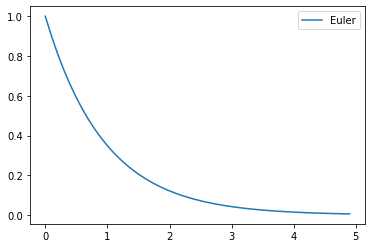

In [ ]:
dt = 0.1
t = np.arange(0, 5, dt)
x = np.zeros(len(t))
x[0] = 1
for i in range(len(t)-1):
    x[i+1] = x[i] + dt*deriv(x[i],t[i])
plt.plot(t, x, label='Euler')
plt.legend()

Plot the difference between the numeric solution and the anlytical solution. Do you have comments ?

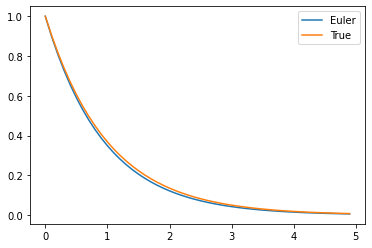

In [ ]:
plt.plot(t, x, label='Euler')
plt.plot(t, x[0]*np.exp(-k*t), label = 'True')
plt.legend()

Redo the same exercice for dt=0.2, 0.4, 0.8, 1.6,Comment ?

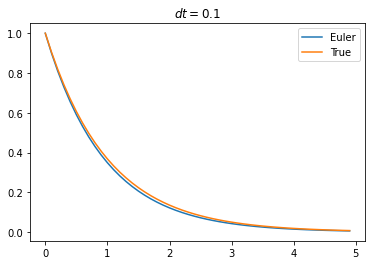

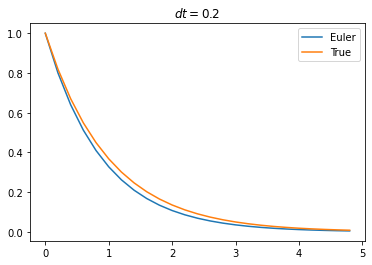

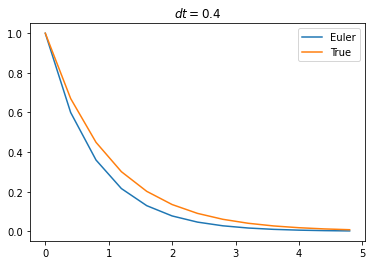

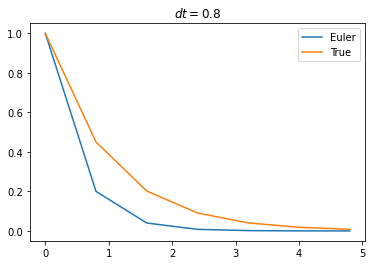

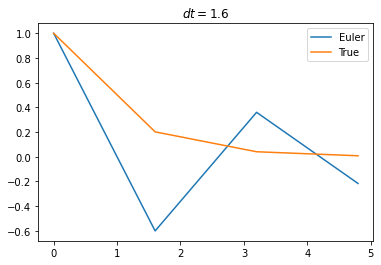

In [ ]:
dt = [0.1, 0.2, 0.4, 0.8, 1.6]
for DT in dt:
    t = np.arange(0, 5, DT)
    x = np.zeros(len(t))
    x[0] = 1
    for i in range(len(t)-1):
        x[i+1] = x[i] + DT*deriv(x[i],t[i])
    plt.plot(t, x, label='Euler')
    plt.plot(t, x[0]*np.exp(-k*t), label = 'True')
    plt.title('$dt=$'+str(DT),fontsize=12)
    plt.legend()
    plt.show()

#### 1.2 Second order solver


Redo the same as before, but with the modifed Euler explicit scheme (see lecture)

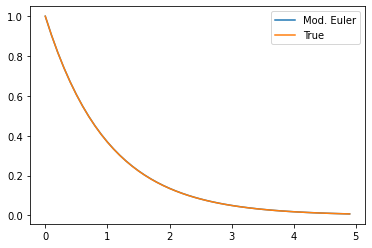

In [ ]:
dt = 0.1
t = np.arange(0, 5, dt)
x = np.zeros(len(t))
x[0] = 1
for i in range(len(t)-1):
    k1 = x[i] + dt/2 * deriv(x[i], t[i])
    x[i+1] = x[i] + dt * deriv(k1, t[i]+dt/2)
plt.plot(t, x, label='Mod. Euler')
plt.plot(t, x[0]*np.exp(-k*t), label = 'True')
plt.legend()

## 2 Energy conservative system: orbital motion in 2D (2nd order solver)

We now solve an energy conservative system, with no, or complex solution. We consider the gravity equation of a body with mass body with mass M. The equation of motion is :

$\frac{d^2X }{dt^2}=-\frac{GM}{r^2}\times\frac{X}{r}$


$\frac{d^2Y }{dt^2}=-\frac{GM}{r^2}\times\frac{Y}{r}$




Where G is the universal gravity constant and $r=(X^2+Y^2)^{1/2}$. This is a coupled system of 2 second order equations. Rewrite it as a system of 4 first order equations, using $V_x$ and $V_y$ : the X and Y component of velocity in cartesian coordinates.

The system of 4 first order equations is : 

$\frac{dV_x}{dt}=-\frac{GM}{r^2}\times\frac{X}{r}$

$\frac{dV_y}{dt}=-\frac{GM}{r^2}\times\frac{X}{r}$

$\frac{dx}{dt}=V_x$

$\frac{dx}{dt}=V_y$

We will take the Earth-Moon system (check mass values on internet, work in METRIC SYSTEM UNITS !!) We will consider that the initial position of the moon at time=0 is X=384000km , Y=0, and that its velocity is Vx=0, $Vy=+a \omega $, where $a$ is the inital Earth-Moon distance (called semi-major axis), and $\omega=(GM/a^3)^{1/2}$ is the orbital angular velocity. The orbital period of the Moon, in, in theory should be $T=2\pi/\omega$

Write a function called $gravderiv(X,Y,Vx,Vy,t)$ that returns the derivative of vector (X,Y,Vx,Vy)

In [2]:
def gravderiv(X,Y,Vx,Vy,t):
    dvxdt = -G*M*X/((X**2+Y**2)**(1.5))
    dvydt= -G*M*Y/((X**2+Y**2)**(1.5))
    dxdt = Vx
    dydt = Vy
    return np.array([dxdt, dydt, dvxdt, dvydt])

Write a program that integrate the Moon motion, from time=0 to time=100T, uwint the Modified Euler method.

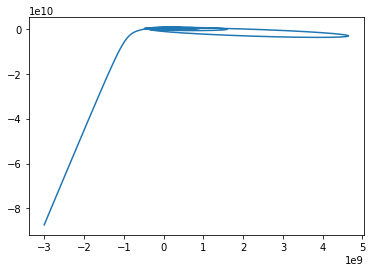

In [4]:
G, M = 6.67408e-11, 5.972e24 
omega = (G*M/384e6**3)**.5
T = 2*np.pi/omega
dt = .01*T
t = np.arange(0, 100*T, dt)
U = np.zeros((4,len(t)))
U[:,0] = np.array([384e6, 0., 0., 384e6*omega])

for i in range(len(t)-1):
    K1 = U[:,i] + dt/2 * gravderiv(U[0][i], U[1][i], U[2][i], U[3][i], t[i])
    U[:,i+1] = U[:,i] + dt * gravderiv(K1[0], K1[1], K1[2], K1[3], t[i]+dt/2)
plt.plot(U[0,:],U[1,:])

Use first a time-step dt= 0.01T . Plot the Moon motion X(t), Y(t), Vx(t), Vy(t)

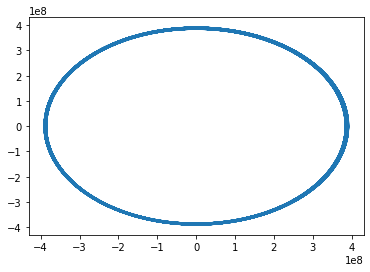

In [11]:
G, M = 6.67408e-11, 5.972e24 
omega = (G*M/384e6**3)**.5
T = 2*np.pi/omega
dt = .01*T
t = np.arange(0, 100*T, dt)
U = np.zeros((4,len(t)))
U[:,0] = np.array([384e6, 0., 0., 384e6*omega])

for i in range(len(t)-1):
    K1 = U[:,i] + dt/2 * gravderiv(U[0][i], U[1][i], U[2][i], U[3][i], t[i])
    U[:,i+1] = U[:,i] + dt * gravderiv(K1[0], K1[1], K1[2], K1[3], t[i]+dt/2)
plt.plot(U[0],U[1])

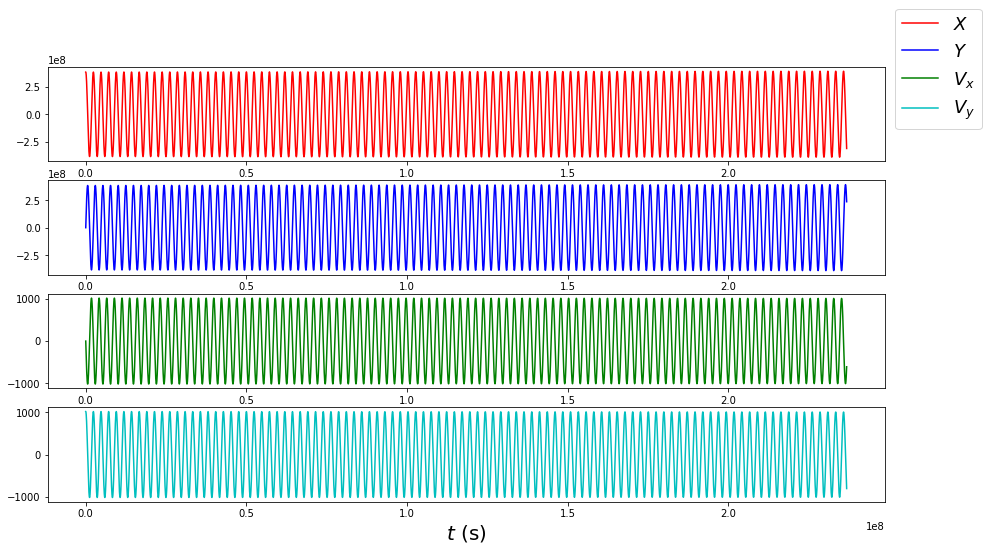

In [12]:
fig, ax = plt.subplots(4, figsize=(15,8))
ax[0].plot(t, U[0], label='$X$', color='r')
ax[1].plot(t, U[1], label='$Y$', color='b')
ax[2].plot(t, U[2], label='$V_x$', color='g')
ax[3].plot(t, U[3], label='$V_y$', color='c')
fig.legend(fontsize=18)
plt.xlabel('$t$ (s)', fontsize=20)
plt.show()

Compute at every time-step the total energy $E_T$ (Kinetic + Potential). Plot energy variations $\Delta_E(t)=\frac{E_T(t)-E_T(t=0)}{E_T(t=0)}$. Is energy really constant ? What happens in your opinion? 

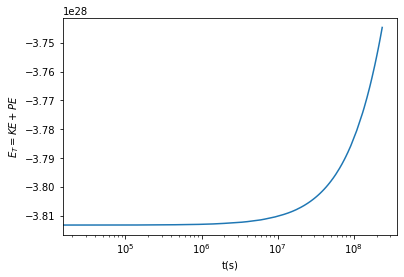

In [21]:
m_moon = 7.34767309e22 
Et = -G*M*m_moon/(U[0]**2 + U[1]**2)**.5 + .5*m_moon*(U[2]**2 + U[3]**2)
plt.plot(t, Et)
plt.ylabel('$E_T = KE+PE$')
plt.xlabel('t(s)')
plt.xscale('log')

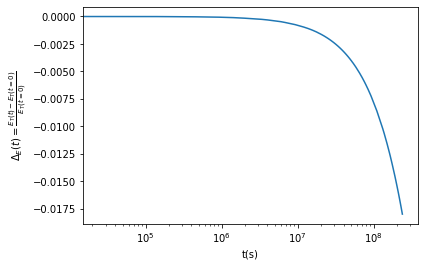

In [23]:
delta_E = (Et - Et[0])/Et[0]
plt.plot(t, delta_E)
plt.ylabel('$\Delta_E(t)=\\frac{E_T(t)-E_T(t=0)}{E_T(t=0)}$')
plt.xlabel('t(s)')
plt.xscale('log')

Redo the same for dt=0.1T and dt=0.5T: Plot the orbit in (X,Y) frame and $E_T$ as a function of time.

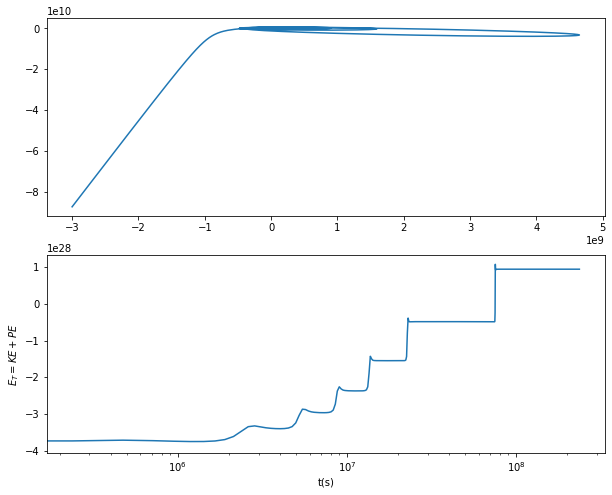

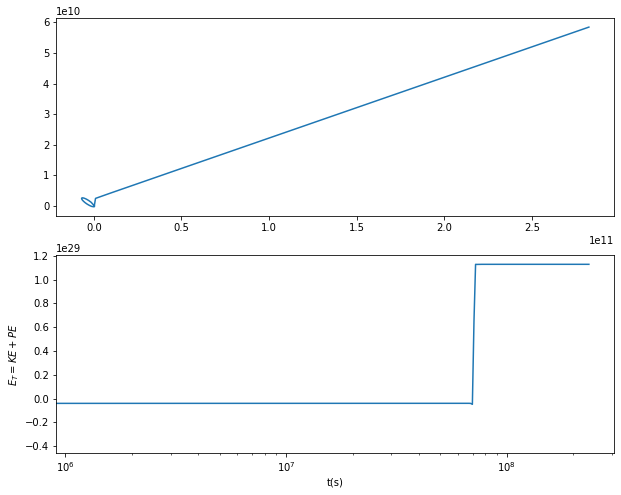

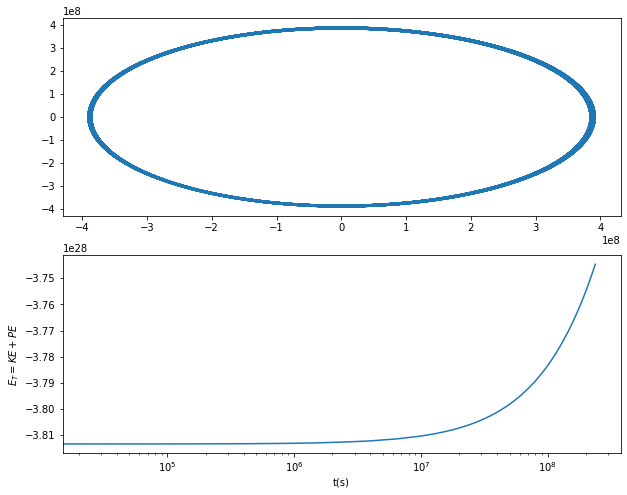

In [29]:
G, M = 6.67408e-11, 5.972e24 
omega = (G*M/384e6**3)**.5
T = 2*np.pi/omega
dt = [0.1*T, 0.5*T, .01*T]

for j in dt:

    t = np.arange(0, 100*T, j)
    U = np.zeros((4,len(t)))
    U[:,0] = np.array([384e6, 0., 0., 384e6*omega])

    for i in range(len(t)-1):
        K1 = U[:,i] + j/2 * gravderiv(U[0][i], U[1][i], U[2][i], U[3][i], t[i])
        U[:,i+1] = U[:,i] + j * gravderiv(K1[0], K1[1], K1[2], K1[3], t[i]+j/2)
    fig, ax = plt.subplots(2, figsize=(10,8))
    ax[0].plot(U[0],U[1])
    ax[1].plot(t ,-G*M*m_moon/(U[0]**2 + U[1]**2)**.5 + .5*m_moon*(U[2]**2 + U[3]**2))
    ax[1].set_ylabel('$E_T = KE+PE$')
    ax[1].set_xlabel('t(s)')
    ax[1].set_xscale('log')

Conclusion : What time-step should you use ? 

$dt = 0.01T$

How to control the quality of your solution  in your opinion?

***A****

Now, let's considere a more complicated orbit. Start the same integration, but now the initial velocity has a small X component initially à t=0: $Vx=e V_y$, $Vy=+a \omega $, with $abs(e) < 1$. Choose e=0.01 and then e=0.1.

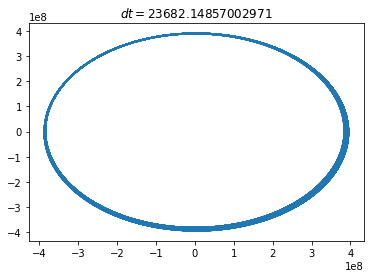

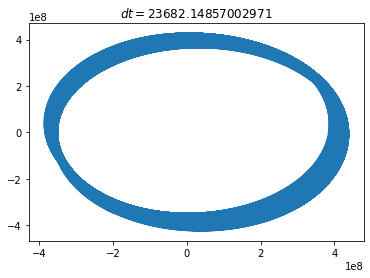

In [31]:
G, M = 6.67408e-11, 5.972e24 
omega = (G*M/384e6**3)**.5
T = 2*np.pi/omega
dt = .01*T
t = np.arange(0, 100*T, dt)
U = np.zeros((4,len(t)))

for e in [0.01, 0.1]:
    U[:,0] = np.array([384e6, 0., e*384e6*omega, 384e6*omega])
    for i in range(len(t)-1):
        K1 = U[:,i] + dt/2 * gravderiv(U[0][i], U[1][i], U[2][i], U[3][i], t[i])
        U[:,i+1] = U[:,i] + dt * gravderiv(K1[0], K1[1], K1[2], K1[3], t[i]+dt/2)
    plt.plot(U[0],U[1])
    plt.title('$dt = $'+str(dt))
    plt.show()

Display energy variations for e=0.01 and then e=0.1. What do you see ?

Multiple oscillations with energy for different values of $e$. Also the orbit is not stable

## 3 Energy conservative system 2 : going to 4th order

Reuse the function that computes the derive in case of planetary motion (exercice 2). Now change the solver and code a Runge Kutta 4 scheme, that is 4th order. Put your code below. 

In [33]:
def gravderiv(X,Y,Vx,Vy,t):
    dvxdt = -G*M*X/((X**2+Y**2)**(1.5))
    dvydt= -G*M*Y/((X**2+Y**2)**(1.5))
    dxdt = Vx
    dydt = Vy
    return np.array([dxdt, dydt, dvxdt, dvydt])

In [ ]:
G, M = 6.67408e-11, 5.972e24 
omega = (G*M/384e6**3)**.5
T = 2*np.pi/omega
dt = .01*T
t = np.arange(0, 100*T, dt)
U = np.zeros((4,len(t)))
U[:,0] = np.array([384e6, 0., 0., 384e6*omega])

for i in range(len(t)-1):
    K1 = dt * gravderiv(U[0][i], U[1][i], U[2][i], U[3][i], t[i])
    K2 = dt * gravderiv(U[0][i]+K1[0]/2, U[1][i]+K1[1]/2, U[2][i]+K1[2]/2,
                        U[3][i]+K1[3]/2, t[i]+dt/2)
    K3 = dt * gravderiv(U[0][i]+K2[0]/2, U[1][i]+K2[1]/2, U[2][i]+K2[2]/2,
                        U[3][i]+K2[3]/2, t[i]+dt/2)
    K4 = dt * gravderiv(U[0][i]+K3[0], U[1][i]+K3[1], U[2][i]+K3[2],
                        U[3][i]+K3[3], t[i]+dt)
    U[:,i+1] = U[:,i] + (1/6) * (K1 + 2*K2 + 2*K3 + K4)
plt.plot(U[0],U[1])

Using the same time-steps as before, plot the motion of the moon, and now compute and display energy variations as a function of time.

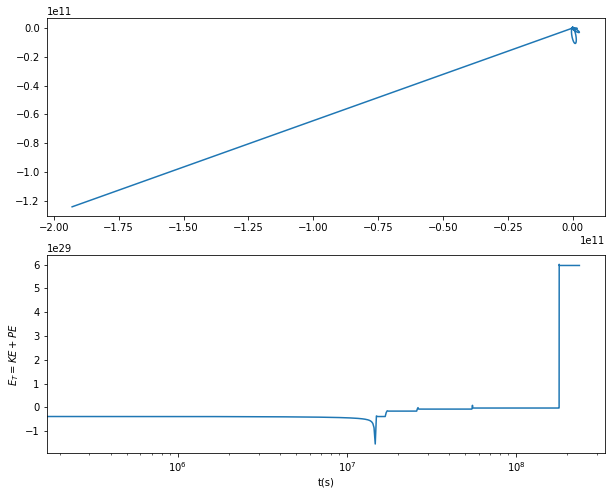

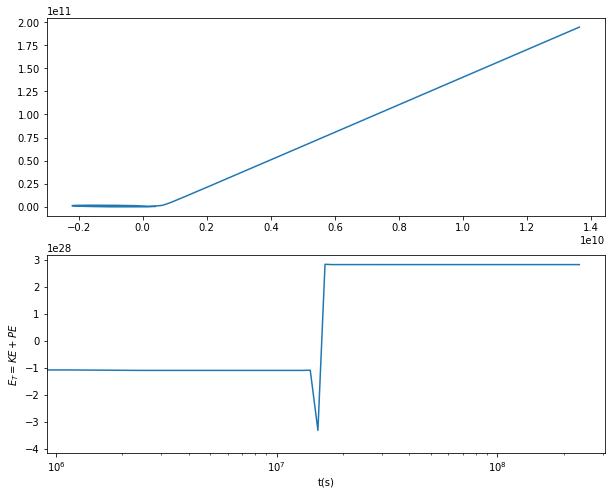

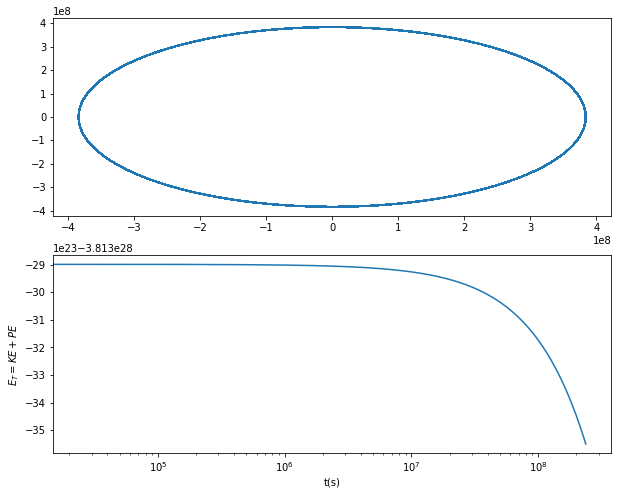

In [43]:
G, M = 6.67408e-11, 5.972e24 
omega = (G*M/384e6**3)**.5
T = 2*np.pi/omega
dt = [0.1*T, 0.5*T, .01*T]

for j in dt:

    t = np.arange(0, 100*T, j)
    U = np.zeros((4,len(t)))
    U[:,0] = np.array([384e6, 0., 0., 384e6*omega])

    for i in range(len(t)-1):
        K1 = j * gravderiv(U[0][i], U[1][i], U[2][i], U[3][i], t[i])
        K2 = j * gravderiv(U[0][i]+K1[0]/2, U[1][i]+K1[1]/2, U[2][i]+K1[2]/2,
                            U[3][i]+K1[3]/2, t[i]+j/2)
        K3 = j * gravderiv(U[0][i]+K2[0]/2, U[1][i]+K2[1]/2, U[2][i]+K2[2]/2,
                            U[3][i]+K2[3]/2, t[i]+j/2)
        K4 = j * gravderiv(U[0][i]+K3[0], U[1][i]+K3[1], U[2][i]+K3[2],
                            U[3][i]+K3[3], t[i]+j)
        U[:,i+1] = U[:,i] + (1/6) * (K1 + 2*K2 + 2*K3 + K4)
    fig, ax = plt.subplots(2, figsize=(10,8))
    ax[0].plot(U[0],U[1])
    ax[1].plot(t ,-G*M*m_moon/(U[0]**2 + U[1]**2)**.5 + .5*m_moon*(U[2]**2 + U[3]**2))
    ax[1].set_ylabel('$E_T = KE+PE$')
    ax[1].set_xlabel('t(s)')
    ax[1].set_xscale('log')

It may be also interesting to plot the angular momentum of the Moon as a function of time. This should be also conserved. Is it the case ?

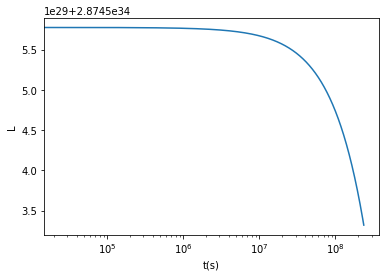

In [48]:
L = m_moon * ((U[2]**2 + U[3]**2)**.5) * ((U[0]**2 + U[1]**2)**.5) # L = m(rxv)
plt.plot(t, L)
plt.ylabel('L')
plt.xlabel('t(s)')
plt.xscale('log')

## 4 : Interest of implicit solver ! Free-Fall in a viscous fluid

We consider the motion of a particle with mass m, radius r free-faling in a fluid. The particle is inserted at altitude Z with 0 velocity initially.  It suffers the weight force ($Fg=-mg$) plus a friction force, the "Stokes Force", so that :

$F_S =-6\pi \mu r v$

with $\mu$ is the fluid dynamical viscosity (in $Pa S$) , r is the particle radius, and v is its velocity (positive when directed upward, negative when directed downward, so that the Z axis is directed upward by convention)

We solve the system of equation $\frac{dZ}{dt}=?$ and $\frac{d V_Z }{dt}=?$

Write the system of equation we want to  solve. We call U the vector U(t)=(Z(t),$V_z(t)$)

$\frac{dZ}{dt}=V_z(t) = (g-6\pi\mu rv/m)t$

$\frac{d V_Z}{dt} = g-6\pi\mu rv/m$

Write a function call Deriv_free_fall$(U,t)$ that returns $\frac{dU}{dt}$

In [3]:
def Deriv_free_fall(A, t):
    kappa = g - 6*np.pi*mu*r*A[1]/m
    dzdt = kappa*t
    dvzdt = kappa
    return np.array([dzdt, dvzdt])

Solve the motion of the particle, using $\mu=2\times 10^{-5} kg/m/s$ (dynamic viscosity of air) and for r=10cm, and $m=1kg$. Plot Z(t) and Vz(t) 

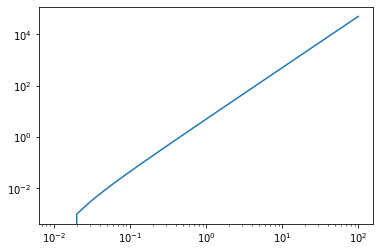

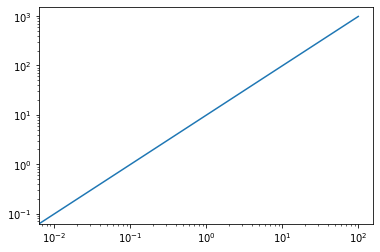

In [6]:
dt = 0.01
mu, r, m, g = 2e-5, .1, 1, 9.81
t = np.arange(0, 100, dt)
U = np.zeros((2,len(t)))
U[:, 0] = np.array([0, 0])
for i in range(len(t)-1):
    U[:, i+1] = U[:, i] + dt * Deriv_free_fall(U[:, i], t[i])
plt.loglog(t, U[0], label='$Z(t)$')
plt.show()
plt.loglog(t, U[1], label='$V_z(t)$')
plt.show()

What is the terminal velocity $V_T$ ? 

What is the coupling timescale $\tau$ (time necessary for the particle to reach 1/2 of $V_T$)

Now try to integrate the motion with dt=0.5 $\tau$  ? What happen ?

In order to cure that problem, we want to switch to an IMPLICIT EULER METHOD (1st order).
Write the Euler implicit numerical scheme  ($U_{n+1}=$ a function of $U_{n+1}$ and $U_n$)

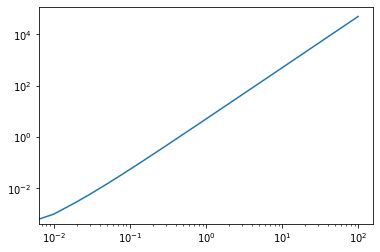

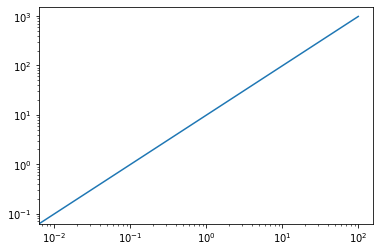

In [7]:
dt = 0.01
mu, r, m, g = 2e-5, .1, 1, 9.81
t = np.arange(0, 100, dt)
U = np.zeros((2,len(t)))
U[:, 0] = np.array([0, 0])
for i in range(len(t)-1):
    U[:, i+1] = U[:, i] + dt * Deriv_free_fall(U[:, i+1], t[i+1])
plt.loglog(t, U[0], label='$Z(t)$')
plt.show()
plt.loglog(t, U[1], label='$V_z(t)$')
plt.show()

By solving analytically the above equation, derive an equation allowing to compute $U_{n+1}$ as a function of $U_n$

Write a code that solve implicitely the motion of the particle in the viscous fluid.

Try different timesteps from 0.1$\tau$ to 2$\tau$ ? Does the integration breaks even for big timestep ?


THIS IS THE MAGIC OF IMPLICIT SOLVERS !